# Bangalore Housing Price Analysis

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [2]:
#Reading the csv file and converting into DataFrame format
df=pd.read_csv("C:/Users/shakt/OneDrive/Desktop/Data_Sets/BHP.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
# Listing the number of columns of the DF
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

# removing the outliers considering the 'price' column with the help of percentile .

#There might be some highest price and lowest price which would be creating huge difference in calculating mean of that column hence removing the highest and lowest with the help of percentile


In [4]:
# finding the lower percentile value of the price column 
quan_low=df['price'].quantile(0.001, interpolation='lower')
quan_low

11.0

In [5]:
# finding the higher percentile value of the price column 
quan_high=df['price'].quantile(0.999, interpolation='higher')
quan_high

2000.0

In [6]:
#finding price ranges greater than 2000.00 or lesser than 11.0 
df[(df['price']<quan_low ) | (df['price']>quan_high)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
408,Super built-up Area,19-Jan,Rajaji Nagar,7 BHK,NaN,12000,6.0,3.0,2200.00
605,Super built-up Area,19-Jan,Malleshwaram,7 BHK,NaN,12000,7.0,3.0,2200.00
1471,Built-up Area,18-Mar,Kengeri,1 BHK,NaN,340,1.0,1.0,10.00
2437,Built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,395,1.0,1.0,10.25
2623,Plot Area,18-Jul,Dodsworth Layout,4 Bedroom,NaN,30000,4.0,NaN,2100.00
3180,Super built-up Area,Ready To Move,Shanthala Nagar,5 BHK,Kierser,8321,5.0,3.0,2700.00
4113,Super built-up Area,18-Jan,BTM Layout,3 BHK,NaN,167Sq. Meter,3.0,2.0,10.00
4162,Built-up Area,Ready To Move,Yemlur,4 Bedroom,Epllan,7000,5.0,NaN,2050.00
5410,Super built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,400,1.0,1.0,10.00
6421,Plot Area,18-Sep,Bommenahalli,4 Bedroom,Prood G,2940,3.0,2.0,2250.00


In [7]:
#converting the df which will have price range >=11.0 and <=2000.0 as this will exclude all the higher and lower price ranges (which are odds)
df=df[(df['price']>=quan_low ) & (df['price']<=quan_high)]
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [8]:
# listing the min and max value of the price column and they look as we set
df['price'].min(),df['price'].max()

(11.0, 2000.0)

In [9]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# Data Cleansing

In [10]:
#finding number of null values of each column
df.isna().sum()

area_type          0
availability       0
location           1
size              15
society         5485
total_sqft         0
bath              72
balcony          603
price              0
dtype: int64

In [11]:
#seeing the df which has size column value equals to null
df.loc[df['size'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [12]:
# dropping the rows if any value is null in size column of the df
df=df.dropna(how='any', subset=['size'])
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [13]:
df.isna().sum()

area_type          0
availability       0
location           1
size               0
society         5482
total_sqft         0
bath              57
balcony          588
price              0
dtype: int64

In [14]:
#society column has large number number of null values. Instead of removing , we are assigning  manual value as 'Unknown'
df.loc[df['society'].isna(),'society']='Unknown'

In [15]:
#column bath has some null values and instead of removing, we are substituding them with the mean value of the column.
bath_mean=int(df['bath'].mean())
df.loc[df['bath'].isna(),'bath']=bath_mean

In [16]:
#column balcony has some null values and instead of removing, we are substituding them with the mean value of the column.
bal_mean=int(df['balcony'].mean())
df.loc[df['balcony'].isna(),'balcony']=bal_mean

In [17]:
#removing the row where location column has null value
df=df.dropna(how='any',subset=['location'])

In [18]:
#full dataframe is ready without null value
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Unknown,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Unknown,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Unknown,3600,5.0,1.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [44]:
#listing unique values of the location in the list format
Loc_list=list(df['location'].unique())
Loc_list[:10]

['Electronic City Phase II',
 'Chikka Tirupathi',
 'Uttarahalli',
 'Lingadheeranahalli',
 'Kothanur',
 'Whitefield',
 'Old Airport Road',
 'Rajaji Nagar',
 'Marathahalli',
 'Gandhi Bazar']

In [20]:
#listing the unique values of the size column
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [43]:
#listing unique values of the society column
soc_list=list(df['society'].unique())
soc_list[:10]

['Coomee ',
 'Theanmp',
 'Unknown',
 'Soiewre',
 'DuenaTa',
 'Jaades ',
 'Brway G',
 'Prrry M',
 'Shncyes',
 'Skityer']

In [72]:
#Finding top 10 locations wherethe  most number of 3bhk houses available
df_3bhk = df[df['size']=='3 BHK']
top_10 = df_3bhk['location'].value_counts().nlargest(10).to_frame().reset_index()
top_10.columns=['location','count']
top_10



,location,count
0,Sarjapur Road,165
1,Whitefield,147
2,Kanakpura Road,129
3,Thanisandra,109
4,Uttarahalli,93
5,Yelahanka,76
6,Electronic City,76
7,Hebbal,74
8,Hennur Road,74
9,Bannerghatta Road,69


In [73]:
# showing an interactibe grapgh to have a visualization of the data
fig=px.bar(x=top_10['location'],y=top_10['count'],labels={'x':'Location','y':'Count'},title='Top 10 Location with the Highest Availability of 3BHK Apartments',text_auto=True)
fig.update_layout(title_x=0.5,width=800,
    height=400)
fig.show()


In [24]:
#Finding top 10 locations where the most number of 2bhk houses available
df_2bhk = df[df['size']=='2 BHK']
top_10 = df_2bhk['location'].value_counts().nlargest(10).to_frame().reset_index()
top_10.columns=['location','count']
top_10

,location,count
0,Whitefield,223
1,Electronic City,189
2,Sarjapur Road,139
3,Kanakpura Road,100
4,Raja Rajeshwari Nagar,100
5,Thanisandra,87
6,Haralur Road,84
7,Yelahanka,84
8,Uttarahalli,80
9,Electronic City Phase II,76


In [50]:
# showing an interactibe grapgh to have a visualization of the data
fig=px.pie(top_10,names='location',values='count')
fig.update_layout(width=800,height=400)
fig.show()



In [26]:
#Finding top 10 locations wherethe  most number of 1bhk houses available
df_1bhk = df[df['size']=='1 BHK']
top_10 = df_1bhk['location'].value_counts().nlargest(10).to_frame().reset_index()
top_10.columns=['location','count']
top_10

,location,count
0,Kanakpura Road,27
1,Whitefield,26
2,Electronic City,22
3,Thanisandra,22
4,Chandapura,19
5,Yelahanka,18
6,Kengeri,14
7,Yelahanka New Town,14
8,Attibele,14
9,Sarjapur Road,13


In [51]:
fig=go.Figure(go.Scatter(x=top_10['location'],y=top_10['count'],mode='text+markers+lines',text=top_10['count']))
fig.update_layout(title='Top 10 Location with the Highest Availability of 1BHK Apartments', xaxis_title='Location', yaxis_title='Count',width=800,height=400)
fig.show()

In [28]:
#Filtering the dataframe to have only wher size column equal to 1BHK & 2BHK & 3BHK

df_bhks=df[df['size'].isin(['1 BHK','2 BHK','3 BHK'])]
df_bhks

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Unknown,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Unknown,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
...,...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,Unknown,1262,2.0,2.0,47.00
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [29]:
# dividing the each unique value of size column into seperate columns and concatinating with location column wise.

df_bhks=pd.concat([df['location'],pd.get_dummies(df_bhks['size'])],axis=1)
df_bhks

,location,1 BHK,2 BHK,3 BHK
0,Electronic City Phase II,0.0,1.0,0.0
1,Chikka Tirupathi,NaN,NaN,NaN
2,Uttarahalli,0.0,0.0,1.0
3,Lingadheeranahalli,0.0,0.0,1.0
4,Kothanur,0.0,1.0,0.0
...,...,...,...,...
13315,Whitefield,NaN,NaN,NaN
13316,Richards Town,NaN,NaN,NaN
13317,Raja Rajeshwari Nagar,0.0,1.0,0.0
13318,Padmanabhanagar,NaN,NaN,NaN


In [66]:
#droping the rows which have only null values of 3BHK,2BHK and 1BHK
#finding the top ten location which have most 3BHK,2BHK and 1BHK respectively
dof = df_bhks.dropna(how='all', subset=['1 BHK', '2 BHK', '3 BHK'])
top_10 = dof.groupby(['location']).sum()[['1 BHK', '2 BHK', '3 BHK']].nlargest(10, ['3 BHK','2 BHK','1 BHK'])
print(top_10)

                   1 BHK  2 BHK  3 BHK
location                              
Sarjapur  Road      13.0  139.0  165.0
Whitefield          26.0  223.0  147.0
Kanakpura Road      27.0  100.0  129.0
Thanisandra         22.0   87.0  109.0
Uttarahalli          1.0   80.0   93.0
Electronic City     22.0  189.0   76.0
Yelahanka           18.0   84.0   76.0
Hebbal               0.0   62.0   74.0
Hennur Road          0.0   61.0   74.0
Bannerghatta Road    5.0   59.0   69.0


In [69]:
#3D scatter visual of top 10 location which have most 3BHK,2BHK and 1BHK respectively
top_10 = top_10.reset_index() 
fig=px.scatter_3d(top_10,x='1 BHK',
                  y='2 BHK',
                  z='3 BHK',color='location')
fig.update_layout(width=800,height=600)
                  
fig.show()

In [64]:
# creating data frame which execludes 'Unknown' from df & finding the top 10 locations which have largest number of society
df_soc=df[~df['society'].isin(['Unknown'])]
df_top10=df_soc.groupby(['location'])['society'].value_counts().nlargest(10).to_frame()
df_top10 = df_top10.rename(columns={'society': 'count'}).reset_index() #chnaging the column name
df_top10

,location,society,count
0,Raja Rajeshwari Nagar,GrrvaGr,80
1,Kanakpura Road,PrarePa,63
2,Electronic City Phase II,Sryalan,59
3,Whitefield,Prtates,58
4,Electronic City,GMown E,54
5,Thigalarapalya,Prtanha,51
6,Bisuvanahalli,Prityel,50
7,Thanisandra,Bhmesy,50
8,Budigere,PrityTr,49
9,Electronic City,Prarkun,49


In [60]:
#Interactive graphical visualization
fig = px.bar(df_top10, x='location', y='count', hover_name='society',color='society',text_auto=True)
fig.update_layout(width=800,height=400)
fig.show()

In [34]:
#top 10 location which have the largest average price ranges
grouped = df.groupby('location')
mean_price_top10 = grouped['price'].mean().nlargest(10).to_frame().reset_index()
mean_price_top10

,location,price
0,Cubbon Road,1900.000000
1,Church Street,1068.000000
2,D Souza Layout,1015.000000
3,Sindhi Colony,988.000000
4,Yemlur,973.812500
5,Srinivas Colony,922.000000
6,Binnamangala,900.000000
7,Cunningham Road,824.384615
8,Sadashiva Nagar,819.444444
9,Hunasamaranahalli,787.500000


In [57]:
fig=go.Figure(go.Scatter(x=mean_price_top10['location'],y=mean_price_top10['price'],mode='text+markers+lines',text=mean_price_top10['price']))
fig.update_layout(title='Top10 locations have the highest average prices', xaxis_title='Location', yaxis_title='price',width=800,height=400)
fig.show()

In [36]:
#top10 locations which have largest price per sqr_ft
max_price_top10 = grouped['price'].max().nlargest(10).to_frame().reset_index()
max_price_top10

,location,price
0,Dollars Colony,2000.0
1,Yemlur,2000.0
2,Cubbon Road,1900.0
3,Sadashiva Nagar,1850.0
4,Dodsworth Layout,1824.0
5,Cunningham Road,1800.0
6,Ramagondanahalli,1800.0
7,Malleshwaram,1700.0
8,Rajaji Nagar,1700.0
9,Church Street,1600.0


In [58]:
#visualization
fig=px.pie(max_price_top10,names='location',values='price')
fig.update_layout(width=800,height=400)
fig.show()

In [38]:
#top10 locations which have smallest price per sqr_ft
min_price_top10 = grouped['price'].max().nsmallest(10).to_frame().reset_index()
min_price_top10

,location,price
0,Anekal,16.00
1,BAGUR,17.00
2,Makali,18.00
3,Alur,20.00
4,Bilal Nagar,20.00
5,Kengeri Satellite Town Stage II,20.00
6,Pillanna Gardens,20.00
7,Shauhardha Layout,20.00
8,Venkateswara Nagar,20.00
9,P&T Colony,20.03


In [59]:
#visualization
fig=px.pie(min_price_top10,names='location',values='price')
fig.update_layout(width=800,height=400)
fig.show()

# Correlation shows the relationship density of all the numerical columns

In [40]:
#finding correlation of the dataframe
corr= df.corr()
corr

,bath,balcony,price
bath,1.000000,0.142664,0.484198
balcony,0.142664,1.000000,0.076473
price,0.484198,0.076473,1.000000


<AxesSubplot:>

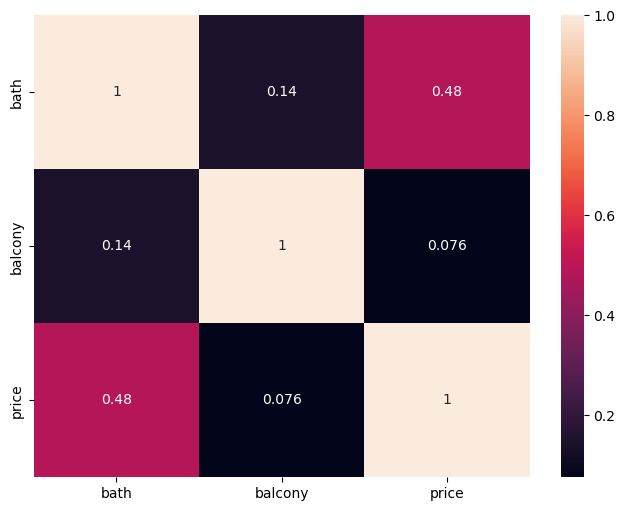

In [41]:
#creating heatmap to have clear identification of the relationship
fig=plt.figure(figsize=(8,6),dpi=100)
sns.heatmap(data=corr,annot=True, cmap='rocket')

In [42]:
#important finding of the HeatMap:
#   =>weak relationship between balcony and price so not much impact in prices due to balcony
#   =>positive relationship between bath and price so there is an impact in the price due to bath.

#based on no of bathrooms , prices will get changed